In [ ]:
!rm -rf "/content/waste_dataset"

In [ ]:
!unzip "/content/waste_dataset_224.zip"

In [6]:
import os

In [3]:
!pip install split_folders

In [1]:
import splitfolders
splitfolders.ratio("/content/waste_dataset_224", output="/content/waste_dataset", seed=42, ratio=(.80, .0, .20))

Copying files: 2527 files [00:00, 7277.75 files/s]


In [2]:
train_path = "/content/waste_dataset/train"
val_path = "/content/waste_dataset/val"
test_path = "/content/waste_dataset/test"

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
image_height = 224
image_width = 224

In [7]:
training_data = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_path,target_size=(image_height,image_width),classes=os.listdir(train_path),batch_size = 32)
#validation_data = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=val_path,target_size=(image_height,image_width),classes=os.listdir(val_path)) 
testing_data = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path,target_size=(image_height,image_width),classes=os.listdir(test_path))

Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Flatten

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import layers

In [10]:
mnv2 = MobileNetV2(input_shape=(image_height,image_width,3), weights="imagenet", include_top=False, classes=6)

In [11]:
for layer in mnv2.layers:
  layer.trainable = False

In [12]:
x = layers.Flatten()(mnv2.output)
prediction = layers.Dense(units = 6, activation="softmax")(x)

model = tf.keras.models.Model(inputs = mnv2.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [13]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy, Accuracy
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['Accuracy'])

In [15]:
model.fit(training_data,epochs=50)

Epoch 1/50
64/64 [==============================] - 10s 69ms/step - loss: 4.3496 - accuracy: 0.0308
Epoch 2/50
64/64 [==============================] - 4s 67ms/step - loss: 0.8445 - accuracy: 0.1153
Epoch 3/50
64/64 [==============================] - 4s 67ms/step - loss: 0.3405 - accuracy: 0.1675
Epoch 4/50
64/64 [==============================] - 4s 67ms/step - loss: 0.1515 - accuracy: 0.1862
Epoch 5/50
64/64 [==============================] - 4s 67ms/step - loss: 0.1021 - accuracy: 0.2045
Epoch 6/50
64/64 [==============================] - 4s 66ms/step - loss: 0.0443 - accuracy: 0.2278
Epoch 7/50
64/64 [==============================] - 4s 67ms/step - loss: 0.0222 - accuracy: 0.2339
Epoch 8/50
64/64 [==============================] - 4s 65ms/step - loss: 0.0425 - accuracy: 0.2392
Epoch 9/50
64/64 [==============================] - 4s 66ms/step - loss: 0.1218 - accuracy: 0.2434
Epoch 10/50
64/64 [==============================] - 4s 66ms/step - loss: 0.1261 - accuracy: 0.2705
Epoch 11

In [16]:
pred = model.predict(testing_data)

In [17]:
import numpy as np
pred = np.argmax(pred,axis = -1)

In [18]:
confusion_matrix(pred,testing_data.classes)

array([[33,  7, 21, 22, 33, 20],
       [ 6,  1,  5,  4,  7,  1],
       [10,  2, 15, 15, 12, 13],
       [26,  5, 10, 21, 14, 11],
       [25,  9, 16, 16, 14, 19],
       [19,  4, 14, 19, 21, 18]])

In [19]:
print(classification_report(pred,testing_data.classes))

              precision    recall  f1-score   support

           0       0.28      0.24      0.26       136
           1       0.04      0.04      0.04        24
           2       0.19      0.22      0.20        67
           3       0.22      0.24      0.23        87
           4       0.14      0.14      0.14        99
           5       0.22      0.19      0.20        95

    accuracy                           0.20       508
   macro avg       0.18      0.18      0.18       508
weighted avg       0.21      0.20      0.20       508



In [20]:
tst_img, tst_labels = next(testing_data)

In [21]:
tst_pred = model.predict(tst_img)
tst_pred  = np.argmax(tst_pred,axis=-1) 

In [22]:
label_dict = testing_data.class_indices
label_dict

{'cardboard': 2, 'glass': 4, 'metal': 5, 'paper': 0, 'plastic': 3, 'trash': 1}

In [23]:
def get_key(val):
  for key, value in label_dict.items():
    if val == value:
        return key

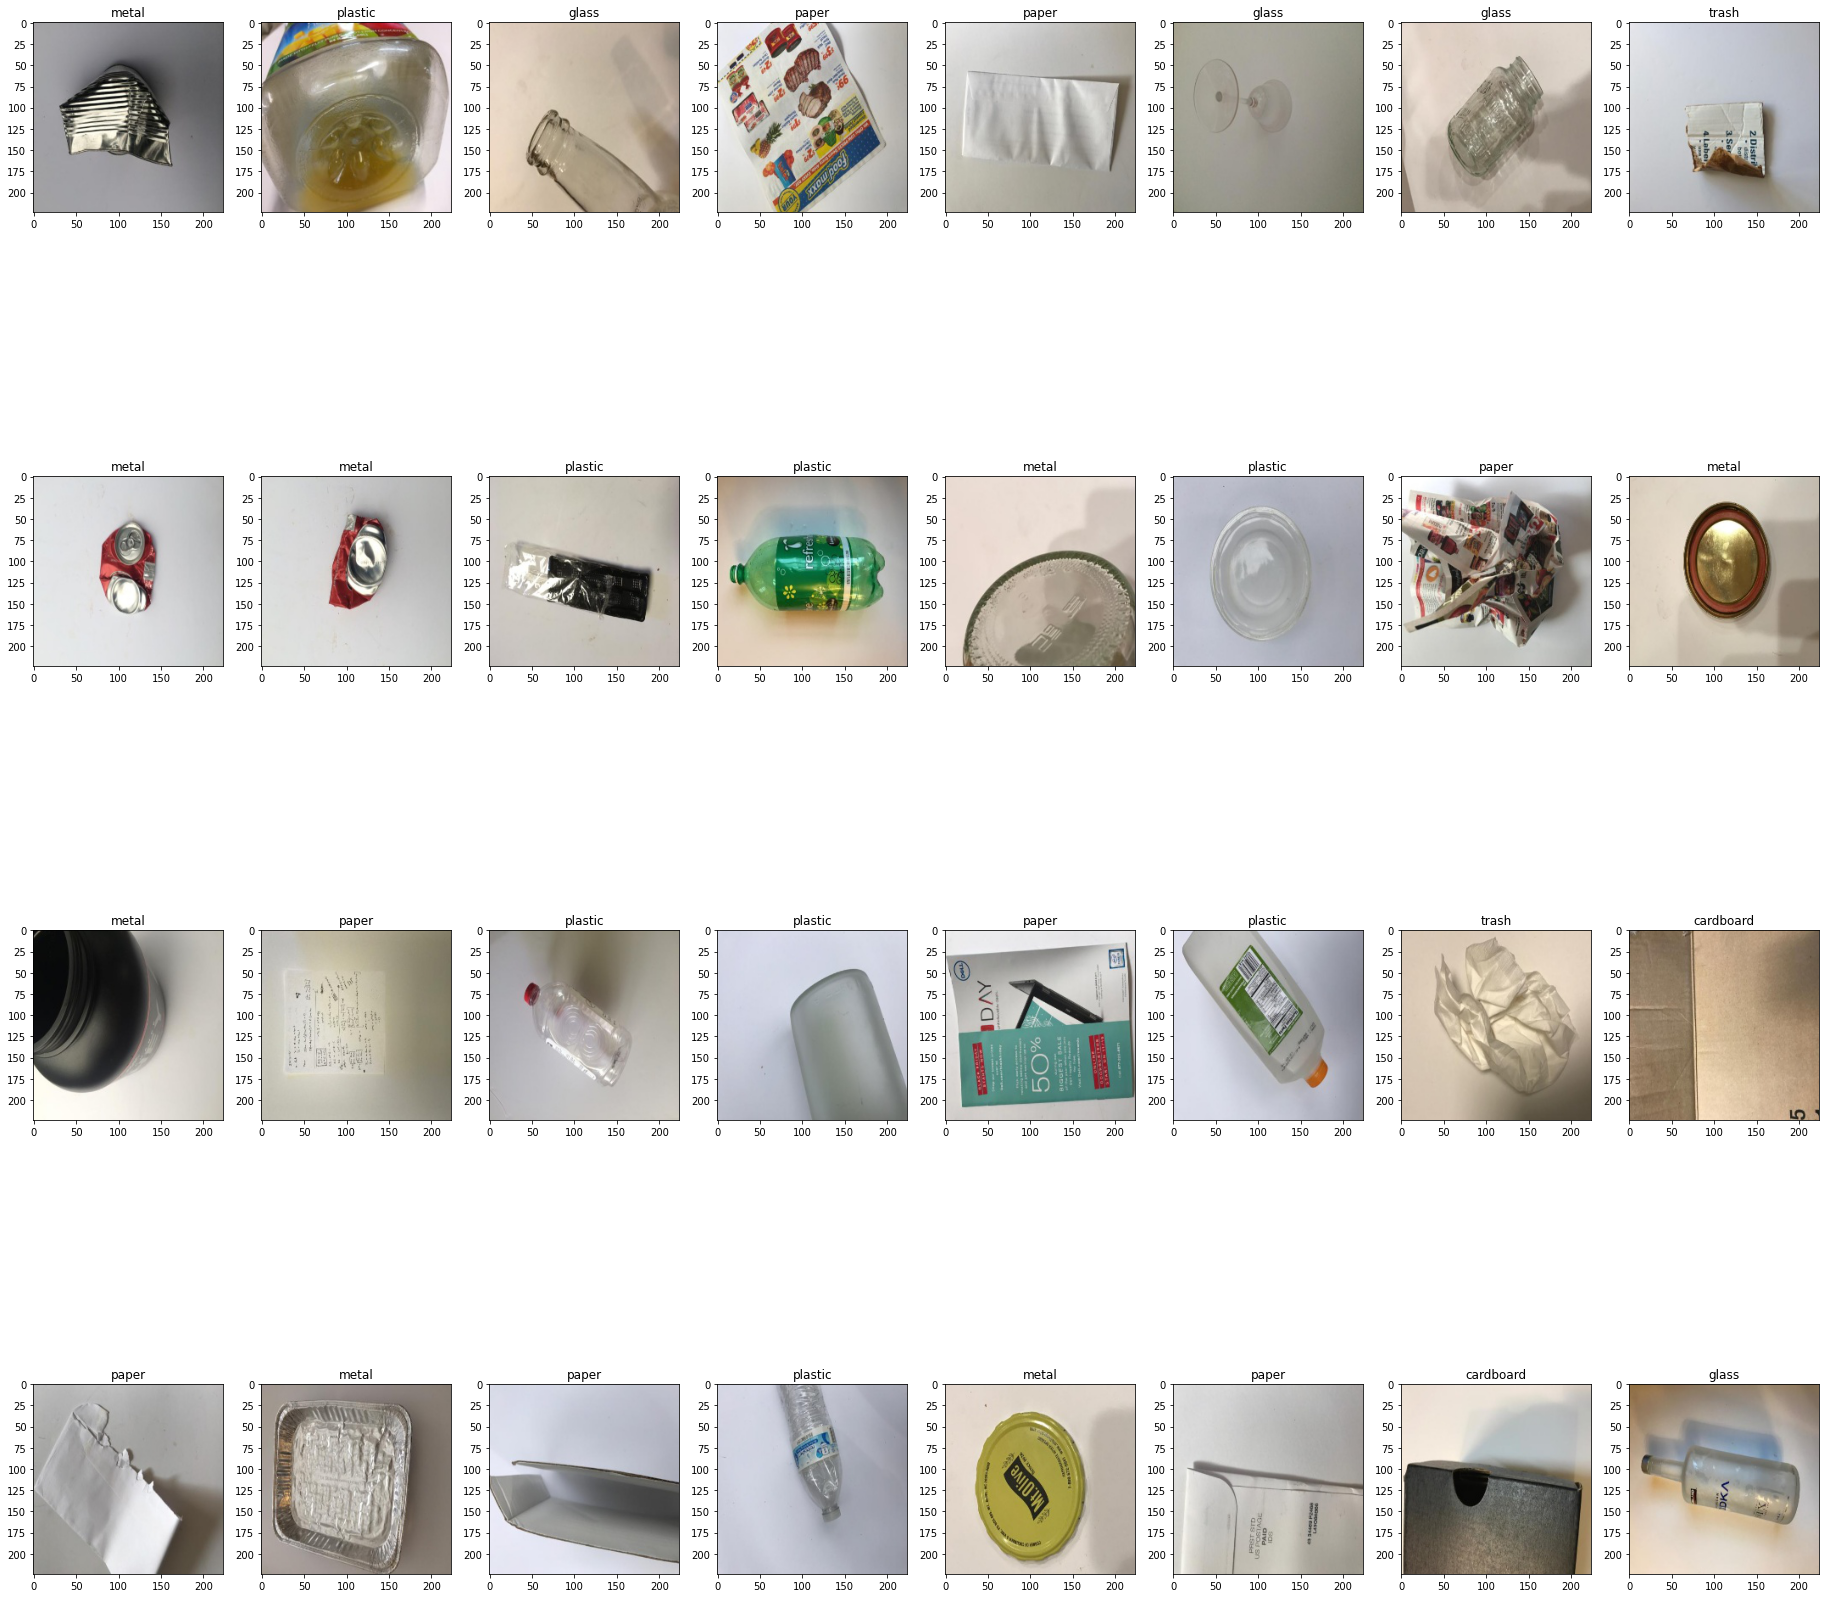

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(32,32))
rows = 4
columns = 8 
for i in range(1,33):
  fig.add_subplot(rows,columns,i)
  plt.imshow(tst_img[i-1])
  plt.title(get_key(tst_pred[i-1]))

plt.show()
plt.savefig('/content/image.png')

In [25]:
print(classification_report(np.argmax(tst_labels,axis=-1),tst_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.50      1.00      0.67         1
           2       1.00      0.50      0.67         4
           3       0.88      0.88      0.88         8
           4       1.00      0.67      0.80         6
           5       0.75      1.00      0.86         6

    accuracy                           0.84        32
   macro avg       0.83      0.84      0.80        32
weighted avg       0.88      0.84      0.84        32

